# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bima Fatwa Muharram
- **Email:** bimamuharram@gmail.com
- **ID Dicoding:** bimamuharram

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda bagi pengguna?
- Bagaimana pengaruh cuaca harian terhadap perilaku penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/bimamuharram/proyek-analisis-data/refs/heads/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [3]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/bimamuharram/proyek-analisis-data/refs/heads/main/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tabel `day_df`, terdapat kolom-kolom seperti `instant`, `dteday`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, dan `cnt`.
- Sementara itu, pada tabel `hour_df`, terdapat kolom-kolom yang sama seperti pada tabel `day_df`, dengan tambahan kolom `hr`. Selain itu, kolom-kolom seperti `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, dan `cnt` memiliki variasi nilai yang mengikuti perubahan pada setiap jam (`hr`), sehingga jumlah baris pada tabel `hour_df` lebih banyak.

### Assessing Data

Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan penilaian, data `day_df` sudah baik karena tidak memiliki *missing* *value* dan duplikat. Namun, terdapat beberapa tipe data yang kurang tepat, seperti kolom `dteday` yang seharusnya bertipe **datetime**, serta kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit` yang lebih tepat jika bertipe **object**. Selain itu, kolom `instant` dinilai tidak diperlukan.
- Data `hour_df` memiliki penilaian yang hampir sama dengan data `day_df`, dengan tambahan bahwa kolom `hr` seharusnya juga bertipe **object**.

### Cleaning Data

Membersihkan Data day_df

In [10]:
day_df = day_df.drop(columns=["instant"])

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
cols_to_object = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

day_df[cols_to_object] = day_df[cols_to_object].astype("object")

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.8+ 

Membersihkan Data hour_df

In [14]:
hour_df = hour_df.drop(columns=["instant"])

In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [16]:
cols_to_object = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

hour_df[cols_to_object] = hour_df[cols_to_object].astype("object")

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  object        
 3   mnth        17379 non-null  object        
 4   hr          17379 non-null  object        
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  object        
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

**Insight:**
- Pada tahap pembersihan data `day_df`, langkah pertama yang dilakukan adalah menghapus kolom `instant`, kemudian mengubah tipe data pada kolom-kolom yang telah dinilai sebelumnya, dan diakhiri dengan pengecekan ulang menggunakan `df.info()`. Hasilnya, `day_df` kini memiliki tipe data yang sesuai dan tidak mengandung kolom yang tidak diperlukan.
- Proses yang sama juga diterapkan pada data `hour_df`, dengan hasil akhir yang serupa.

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

In [18]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,1.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
day_df.groupby(by="season").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
season,,,
3,5644.303191,1202.611702,4441.691489
2,4992.331522,1106.097826,3886.233696
4,4728.162921,729.112360,3999.050562
1,2604.132597,334.928177,2269.204420


In [20]:
day_df.groupby(by="mnth").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
mnth,,,
6,5772.366667,1231.766667,4540.600000
9,5766.516667,1172.050000,4594.466667
8,5664.419355,1161.919355,4502.500000
7,5563.677419,1260.596774,4303.080645
5,5349.774194,1214.274194,4135.500000
10,5199.225806,963.870968,4235.354839
4,4484.900000,1013.366667,3471.533333
11,4247.183333,610.050000,3637.133333
3,3692.258065,716.838710,2975.419355


In [21]:
day_df.groupby(by="holiday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
holiday,,,
0,4527.104225,841.771831,3685.332394
1,3735.000000,1064.714286,2670.285714


In [22]:
day_df.groupby(by="weekday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
weekday,,,
5,4690.288462,752.288462,3938.000000
4,4667.259615,590.961538,4076.298077
6,4550.542857,1465.257143,3085.285714
3,4548.538462,551.144231,3997.394231
2,4510.663462,556.182692,3954.480769
1,4338.123810,674.133333,3663.990476
0,4228.828571,1338.295238,2890.533333


In [23]:
day_df.groupby(by="workingday").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
workingday,,,
1,4584.820000,606.570000,3978.250000
0,4330.168831,1371.134199,2959.034632


In [24]:
day_df.groupby(by="weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
weathersit,,,
1,4876.786177,964.030238,3912.755940
2,4035.862348,687.352227,3348.510121
3,1803.285714,185.476190,1617.809524


**Insight:**
- Rata-rata jumlah pengguna berdasarkan musim, dari yang tertinggi hingga terendah, secara berurutan adalah: musim 3 (gugur), musim 2 (panas), musim 4 (dingin), dan musim 1 (semi).
- Rata-rata jumlah pengguna tertinggi terjadi pada bulan 6 (Juni), sedangkan yang terendah pada bulan 1 (Januari).
- Rata-rata jumlah pengguna lebih tinggi pada hari kerja dibandingkan hari libur.
- Rata-rata jumlah pengguna berdasarkan hari dalam seminggu, dari tertinggi hingga terendah, secara berurutan adalah: hari ke-5 (Sabtu), hari ke-4 (Jumat), hari ke-6 (Minggu), hari ke-3 (Kamis), hari ke-2 (Rabu), hari ke-1 (Selasa), dan hari ke-0 (Senin).
- Rata-rata jumlah pengguna lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur.
- Rata-rata jumlah pengguna berdasarkan kondisi cuaca harian, dari tertinggi hingga terendah, secara berurutan adalah: cuaca 1 (cerah), cuaca 2 (berkabut), dan cuaca 3 (hujan gerimis).

### Explorasi Data hour_df

In [25]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
hour_df.groupby(by="hr").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,casual,registered
hr,,,
17,461.452055,74.273973,387.178082
18,425.510989,61.120879,364.390110
8,359.011004,21.679505,337.331499
16,311.983562,73.745205,238.238356
19,311.523352,48.770604,262.752747
13,253.661180,72.308642,181.352538
12,253.315934,68.293956,185.021978
15,251.233196,74.905350,176.327846
14,240.949246,75.567901,165.381344


In [27]:
hour_df.groupby(by="hr").agg({
    "cnt": "mean",
    "temp": "mean",
    "atemp": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,temp,atemp
hr,,,
17,461.452055,0.554575,0.523224
18,425.510989,0.541181,0.512736
8,359.011004,0.454993,0.440272
16,311.983562,0.564959,0.532460
19,311.523352,0.524176,0.499459
13,253.661180,0.554733,0.525499
12,253.315934,0.540275,0.512903
15,251.233196,0.568615,0.536598
14,240.949246,0.565075,0.534188


In [28]:
hour_df.groupby(by="hr").agg({
    "cnt": "mean",
    "hum": "mean",
}).sort_values(by="cnt", ascending=False)

,cnt,hum
hr,,
17,461.452055,0.513438
18,425.510989,0.535989
8,359.011004,0.702682
16,311.983562,0.495795
19,311.523352,0.572445
13,253.661180,0.511591
12,253.315934,0.536703
15,251.233196,0.492126
14,240.949246,0.496982


In [29]:
hour_df.groupby(by="hr").agg({
    "cnt": "mean",
    "windspeed": "mean"
}).sort_values(by="cnt", ascending=False)

,cnt,windspeed
hr,,
17,461.452055,0.233371
18,425.510989,0.224684
8,359.011004,0.176563
16,311.983562,0.237317
19,311.523352,0.210148
13,253.661180,0.221633
12,253.315934,0.216013
15,251.233196,0.235143
14,240.949246,0.232462


**Insight:**
- Rata-rata jumlah pengguna tertinggi terjadi pada pukul 17.00 (5 sore), sedangkan yang terendah pada pukul 04.00 (4 pagi).
- Pada pukul 17.00, rata-rata suhu ternormalisasi (dalam skala Celsius) adalah 0.55, sedangkan pada pukul 04.00 adalah 0.45.
- Pada pukul 17.00, rata-rata suhu perasaan (atemp) ternormalisasi adalah 0.52, sedangkan pada pukul 04.00 adalah 0.43.
- Pada pukul 17.00, rata-rata kelembapan ternormalisasi adalah 0.51, sedangkan pada pukul 04.00 adalah 0.74.
- Pada pukul 17.00, rata-rata kecepatan angin ternormalisasi adalah 0.23, sedangkan pada pukul 04.00 adalah 0.16.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda bagi pengguna?

Berdasarkan season

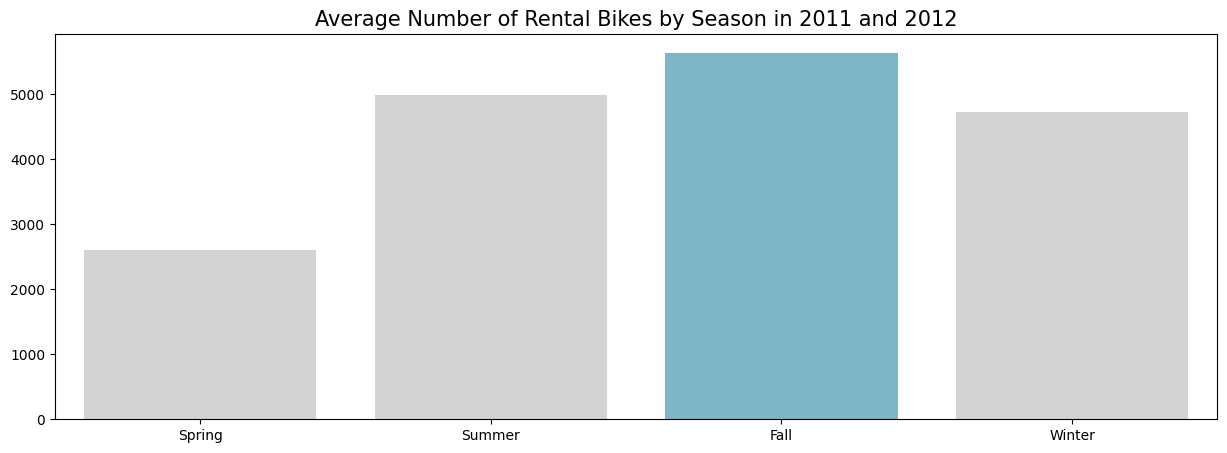

In [30]:
byseason_df = day_df.groupby(by="season").cnt.mean().reset_index()
byseason_df.rename(columns={
    "cnt": "avg_count"
}, inplace=True)

season_dict = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_order = ["Spring", "Summer", "Fall", "Winter"]

byseason_df["season_name"] = byseason_df["season"].map(season_dict)


plt.figure(figsize=(15, 5))
sns.barplot(
    x="season_name",
    y="avg_count",
    data=byseason_df,
    order=season_order,
    hue="season_name",
    palette=["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"],
    legend=False
)

plt.title("Average Number of Rental Bikes by Season in 2011 and 2012", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Berdasarkan month

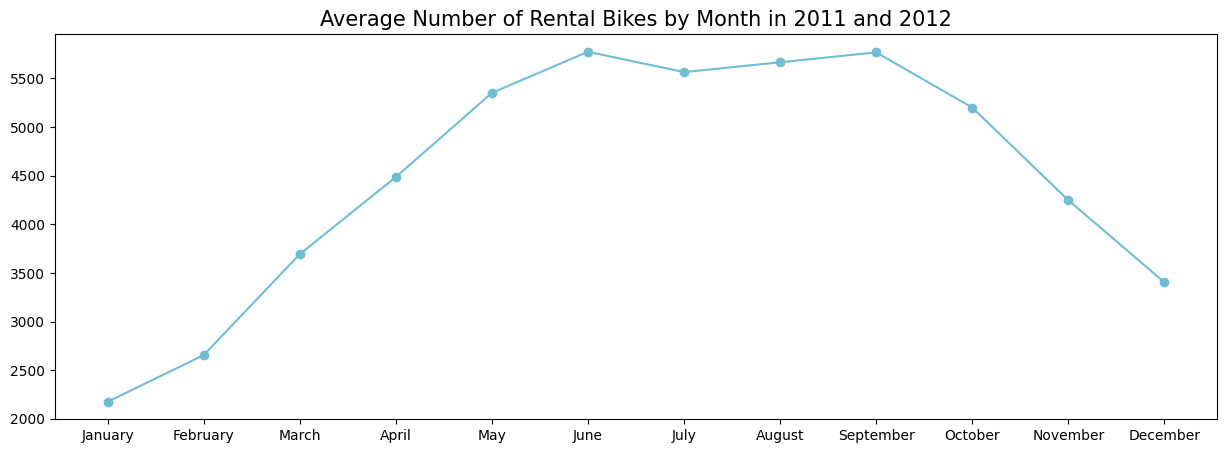

In [31]:
bymonth_df = day_df.groupby(by="mnth").cnt.mean().reset_index()
bymonth_df.rename(columns={
    "cnt": "avg_count"
}, inplace=True)

import calendar

bymonth_df["month_name"]=bymonth_df["mnth"].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(15, 5))
plt.plot(
    bymonth_df["month_name"],
    bymonth_df["avg_count"],
    marker="o",
    color="#72BCD4"
)

plt.title("Average Number of Rental Bikes by Month in 2011 and 2012", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan day

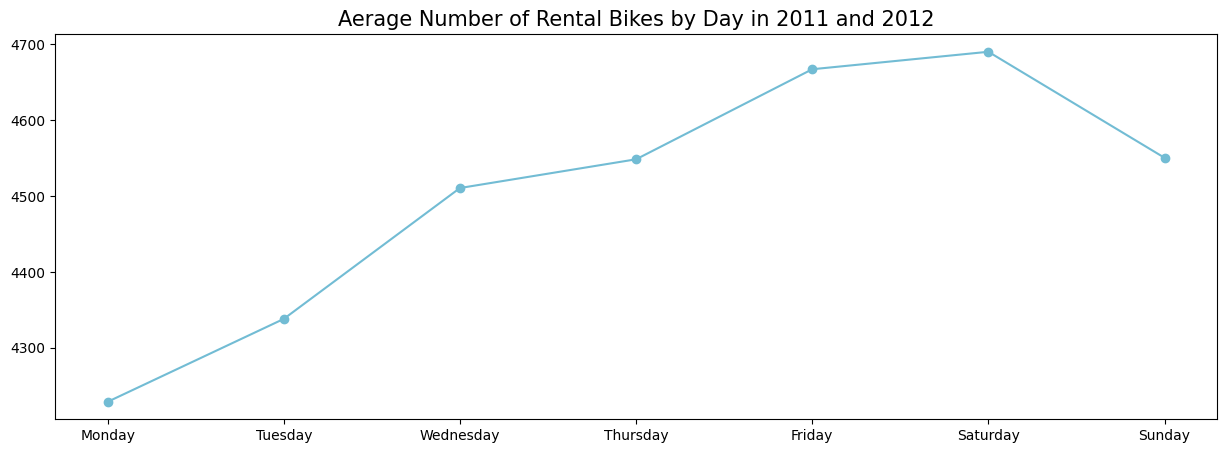

In [32]:
byday_df = day_df.groupby(by="weekday").cnt.mean().reset_index()
byday_df.rename(columns={
    "cnt": "avg_count"
}, inplace=True)

import calendar

byday_df["day_name"]=byday_df["weekday"].apply(lambda x: calendar.day_name[x])

plt.figure(figsize=(15, 5))
plt.plot(
    byday_df["day_name"],
    byday_df["avg_count"],
    marker="o",
    color="#72BCD4"
)

plt.title("Aerage Number of Rental Bikes by Day in 2011 and 2012", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Berdasarkan hour

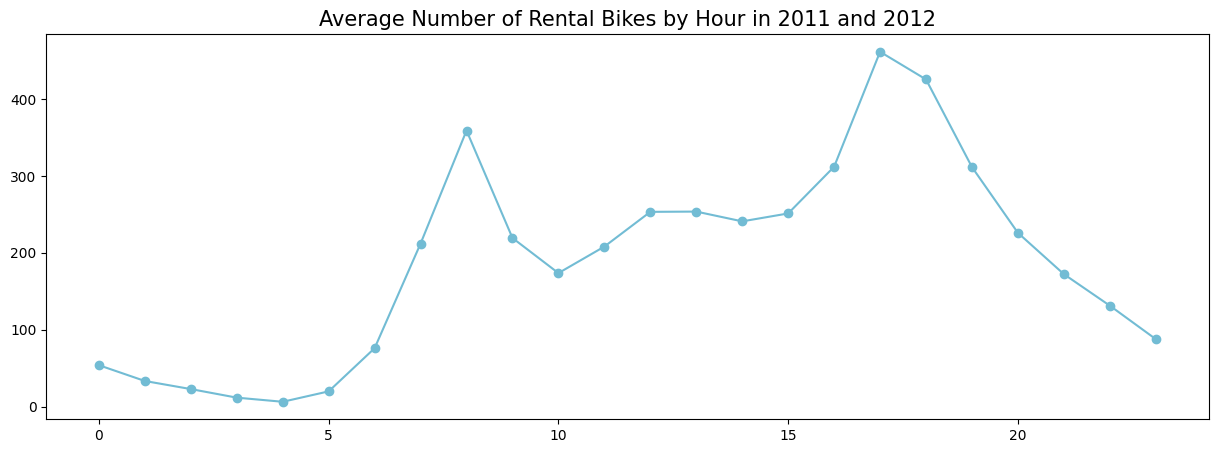

In [33]:
byhour_df = hour_df.groupby(by="hr").cnt.mean().reset_index()
byhour_df.rename(columns={
    "cnt": "mean_count"
}, inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(
    byhour_df["hr"],
    byhour_df["mean_count"],
    marker="o",
    color="#72BCD4"
)

plt.title("Average Number of Rental Bikes by Hour in 2011 and 2012", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Rata-rata jumlah pengguna tertinggi terjadi pada musim gugur, dengan angka di atas 5.000, disusul oleh musim panas dan musim dingin yang masing-masing berada di atas 4.500. Sementara itu, musim semi mencatatkan angka terendah, yakni di bawah 3.000.
- Rata-rata jumlah pengguna tertinggi terjadi pada bulan Juni hingga September, dengan angka di atas 5.000. Jumlah pengguna mulai menurun dari September hingga Desember, mencapai titik terendah pada bulan Januari dengan angka di bawah 2.500, lalu kembali mengalami peningkatan dari Januari hingga Juni.
- Rata-rata jumlah pengguna tertinggi terjadi pada hari Sabtu, lalu menurun secara signifikan pada hari Minggu dan Senin, dengan titik terendah pada hari Senin. Setelah itu, terjadi peningkatan bertahap dari Senin hingga Sabtu.
- Rata-rata jumlah pengguna tertinggi terjadi pada jam-jam sibuk, khususnya pada pukul 08.00, serta 17.00–18.00. Setelah pukul 08.00, terjadi penurunan pada pukul 08.00–10.00, kemudian fluktuatif antara pukul 10.00–17.00, lalu kembali menurun signifikan pada pukul 18.00–04.00, dan meningkat kembali secara signifikan pada pukul 04.00–08.00.

### Pertanyaan 2: Bagaimana pengaruh cuaca harian terhadap perilaku penyewaan sepeda?

Berdasarkan weather

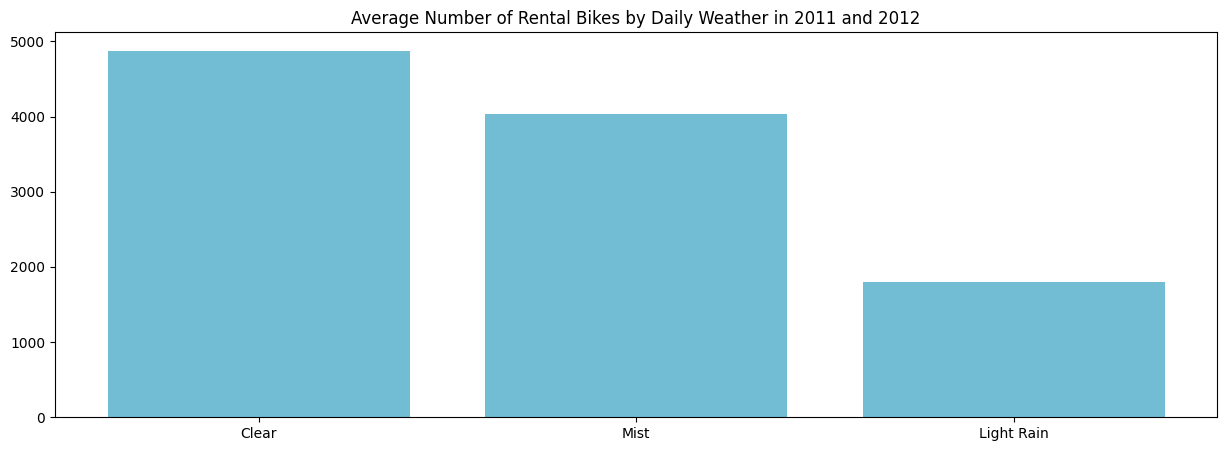

In [34]:
weather_df = day_df.groupby("weathersit")["cnt"].mean().reset_index()

plt.figure(figsize=(15, 5))
plt.bar(weather_df["weathersit"], weather_df["cnt"], color="#72BCD4")

plt.title("Average Number of Rental Bikes by Daily Weather in 2011 and 2012")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([1, 2, 3], ["Clear", "Mist", "Light Rain"])
plt.show()

**Insight:**
- Rata-rata jumlah pengguna tertinggi terjadi pada cuaca cerah, dengan angka yang hampir menyentuh 5.000.
- Rata-rata jumlah pengguna tertinggi kedua terjadi pada cuaca berkabut, dengan angka yang masih berada di atas 4.000.
- Rata-rata jumlah pengguna terendah terjadi pada cuaca hujan gerimis, dengan angka di bawah 2.000.

## Analisis Lanjutan (Opsional)

## Conclusion

**Pertanyaan 1: Kapan waktu paling optimal untuk menyediakan lebih banyak sepeda bagi pengguna?**

Analisis dilakukan dengan menggunakan empat skala waktu: musiman, bulanan, harian, dan per jam.

1. Secara musiman, waktu paling optimal untuk menyediakan lebih banyak sepeda adalah pada musim gugur, disusul oleh musim panas dan musim dingin.
2. Secara bulanan, bulan Juni hingga September menunjukkan jumlah pengguna tertinggi.
3. Secara harian, hari Sabtu menjadi hari dengan rata-rata penyewaan tertinggi, dengan peningkatan bertahap selama hari kerja dari Senin hingga Jumat.
4. Secara per jam, puncak penggunaan terjadi pada jam-jam sibuk (rush hour), khususnya pukul 08.00, serta 17.00–18.00.

Jika seluruh skala waktu tersebut digabungkan, maka waktu paling optimal untuk menyediakan lebih banyak sepeda adalah pada hari Sabtu, dan juga selama hari kerja, pada jam sibuk di bulan Juni hingga September (musim panas dan gugur).

**Pertanyaan 2: Bagaimana pengaruh cuaca harian terhadap perilaku penyewaan sepeda?**

Berdasarkan visualisasi data pertanyaan 2 serta jawaban dari pertanyaan 1, dapat disimpulkan bahwa cuaca harian mempengaruhi perilaku penyewaan sepeda.

Pengguna condong untuk menyewa sepeda pada cuaca cerah atau setidaknya berkabut yang sering terjadi pada musim panas dan musim gugur, serta sebagian musim dingin. Akan tetapi, pengguna condong memilih untuk tidak menyewa sepeda pada cuaca hujan gerimis yang sering terjadi pada musim semi.